In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Updated_CRU.csv')
data.fillna(method='ffill', axis=0, inplace=True)

In [3]:
data.head()

,time,lat,lon,timeseries-tas-monthly-mean,year,month,dayofyear,quarter
0,1901-01-16,26.25,-122.75,16.322001,1901,1,16,1
1,1901-01-16,26.25,-122.25,16.322001,1901,1,16,1
2,1901-01-16,26.25,-121.75,16.322001,1901,1,16,1
3,1901-01-16,26.25,-121.25,16.322001,1901,1,16,1
4,1901-01-16,26.25,-120.75,16.322001,1901,1,16,1


In [4]:
data.shape

(6644352, 8)

In [5]:
import torch
import torch.nn as nn

# Define the LSTM model
model = Model_LSTM(num_features=1, hidden_units=128, timesteps=24, lstm_layers=2)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

# Prepare the data for training
# Assume your data is stored in a variable called 'data'

# split the data into training and test sets
train_data = data[:5000000, :]
test_data = data[5000000:, :]

# Extract the temperature values and convert to a tensor
temp_train = torch.tensor(train_data[:, 0], dtype=torch.float32)
temp_test = torch.tensor(test_data[:, 0], dtype=torch.float32)

# Normalize the temperature values
temp_mean = temp_train.mean()
temp_std = temp_train.std()
temp_train = (temp_train - temp_mean) / temp_std
temp_test = (temp_test - temp_mean) / temp_std

# Reshape the temperature values to 3D tensor with shape (batch_size, timesteps, num_features)
# Assume you want to use a batch size of 256 and timesteps of 24
batch_size = 256
timesteps = 24
temp_train = temp_train.reshape(-1, timesteps, 1)
temp_test = temp_test.reshape(-1, timesteps, 1)

# Define the number of training and test samples
num_train_samples = temp_train.shape[0]
num_test_samples = temp_test.shape[0]

# Training loop
for epoch in range(num_epochs):

    # Shuffle the training data
    perm = torch.randperm(num_train_samples)
    temp_train = temp_train[perm]

    # Initialize the hidden state
    hidden = (torch.randn(lstm_layers, batch_size, hidden_units),
              torch.randn(lstm_layers, batch_size, hidden_units))

    # Iterate over the training batches
    for i in range(0, num_train_samples, batch_size):

        # Get the current batch
        temp_batch = temp_train[i:i+batch_size]

        # Forward pass
        output = model(temp_batch)

        # Compute the loss
        loss = criterion(output, temp_batch)

        # Zero the gradients
        optimizer.zero_grad()

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    # Print the training loss
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# Evaluation on test set
with torch.no_grad():

    # Initialize the hidden state
    hidden = (torch.randn(lstm_layers, batch_size, hidden_units), torch.randn(lstm_layers, batch_size, hidden_units))
    # Initialize the test loss
test_loss = 0

# Iterate over the test batches
for i in range(0, num_test_samples, batch_size):

    # Get the current batch
    temp_batch = temp_test[i:i+batch_size]

    # Forward pass
    output = model(temp_batch)

    # Compute the loss
    loss = criterion(output, temp_batch)
    test_loss += loss.item()

# Print the test loss
test_loss /= num_test_samples / batch_size
print(f'Test Loss: {test_loss}')

NameError: name 'Model_LSTM' is not defined

In [10]:
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split

In [ ]:
num_features = 1
hidden_units = 32


In [5]:
df_copy = data[['time', 'timeseries-tas-monthly-mean', 'lat', 'lon']]

In [6]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6644352 entries, 0 to 6644351
Data columns (total 4 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   time                         object 
 1   timeseries-tas-monthly-mean  float64
 2   lat                          float64
 3   lon                          float64
dtypes: float64(3), object(1)
memory usage: 202.8+ MB


In [7]:
df_copy['time'] = pd.to_datetime(df_copy['time'])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16456\3075872716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['time'] = pd.to_datetime(df_copy['time'])


In [8]:
df_copy.shape

(6644352, 4)

In [24]:
import torch
import torch.nn as nn

# Define the hyperparameters
num_features = 3  # Number of features (time, lat, lon)
hidden_units = 32  # Number of hidden units in the LSTM
timesteps = 12  # Number of timesteps in the LSTM
lstm_layers = 1  # Number of LSTM layers
batch_size = 64  # Number of samples in each batch
num_epochs = 10  # Number of training epochs

# Split the data into train and test sets
train_data, test_data = train_test_split(df_copy, test_size=0.2)

# Extract the temperature, time, latitude, and longitude values from the data
time_train = train_data.iloc[:, 0]
temp_train = train_data.iloc[:, 1]
lat_train = train_data.iloc[:, 2]
lon_train = train_data.iloc[:, 3]
time_test = test_data.iloc[:, 0]
temp_test = test_data.iloc[:, 1]
lat_test = test_data.iloc[:, 2]
lon_test = test_data.iloc[:, 3]

print(f"time_train shape {time_train.shape}")
print(f"temp_train shape {temp_train.shape}")
print(f"lat_train shape {lat_train.shape}")
print(f"lon_train shape {lon_train.shape}")
print(f"time_test shape {time_test.shape}")
print(f"temp_test shape {temp_test.shape}")
print(f"lat_test shape {lat_test.shape}")
print(f"lon_test shape {lon_test.shape}")

print(train_data.shape, test_data.shape)

IndexingError: Too many indexers

In [12]:
class Model_LSTM(nn.Module):
    def __init__(self, num_features, hidden_units, timesteps, lstm_layers):
        super().__init__()
        self.num_features = num_features
        self.hidden_units = hidden_units
        self.num_layers = lstm_layers
        self.seq_len = timesteps
        self.lstm = nn.LSTM(
            input_size=num_features,
            hidden_size=hidden_units,
            batch_first=True,
            num_layers=self.num_layers,
            dropout = 0.2,
        )
        self.dropout = nn.Dropout(0.3)
        self.lstm_linear = nn.Linear(self.seq_len*self.hidden_units+2,1)
    
    def forward(self, temp_batch, lat_batch, lon_batch):
        lat_batch = lat_batch.view(-1, 1)
        print(f"Lat Batch Shape: {lat_batch.shape}")
        lon_batch = lon_batch.view(-1, 1)
        print(f"Lon Batch Shape: {lon_batch.shape}")
        x = torch.cat([temp_batch, lat_batch, lon_batch], dim=1)
        print(f"X Shape: {x.shape}")
        lstm_out, (hn, _) = self.lstm(x)
        print(f"LSTM output Shape: {lstm_out.shape}")
        print(f"hn output Shape: {hn.shape}")
        print(f"_ output Shape: {_.shape}")
        lstm_out = lstm_out.reshape(lstm_out.shape[0], -1)
        print(f"LSTM output Shape: {lstm_out.shape}")
        out = self.dropout(x)
        out = self.lstm_linear(x)
        return out

In [13]:
model = Model_LSTM(num_features, hidden_units, timesteps, lstm_layers)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\rnn.py:89: UserWarning: Failed to initialize NumPy: module compiled against API version 0x10 but this version of numpy is 0xf (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:68.)
  w_ih = Parameter(torch.empty((gate_size, layer_input_size), **factory_kwargs))


In [14]:
for epoch in range(num_epochs):
    for i in range(0, len(temp_train), batch_size):
        # Get the current batch of data
        temp_batch = temp_train[i:i+batch_size].values
        print(f"Temp Batch Shape: {temp_batch.shape}")
        time_batch = time_train[i:i+batch_size].values
        print(f"Time Batch Shape: {time_batch.shape}")
        lat_batch = lat_train[i:i+batch_size].values
        print(f"Lat Batch Shape: {lat_batch.shape}")
        lon_batch = lon_train[i:i+batch_size].values
        print(f"Lon Batch Shape: {lon_batch.shape}")
        
        # Convert the data to tensors
        temp_batch = torch.FloatTensor(temp_batch)
        print(f"Temp Batch Shape: {temp_batch.shape}")
        time_batch = torch.FloatTensor(time_batch)
        print(f"Time Batch Shape: {time_batch.shape}")
        lat_batch = torch.FloatTensor(lat_batch)
        print(f"Lat Batch Shape: {lat_batch.shape}")
        lon_batch = torch.FloatTensor(lon_batch)
        print(f"Lon Batch Shape: {lon_batch.shape}")
        temp_batch = temp_batch.view(batch_size, timesteps, num_features)
        print(f"Temp Batch Shape: {temp_batch.shape}")
    
        # Forward pass
        output = model(temp_batch, lat_batch, lon_batch)
        print(f"Output Batch Shape: {output.shape}")
        loss = criterion(output, temp_batch)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
# Print the loss for each epoch
print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Temp Batch Shape: (64,)
Time Batch Shape: (64,)
Lat Batch Shape: (64,)
Lon Batch Shape: (64,)
Temp Batch Shape: torch.Size([64])
Time Batch Shape: torch.Size([64])
Lat Batch Shape: torch.Size([64])
Lon Batch Shape: torch.Size([64])


RuntimeError: shape '[64, 12, 3]' is invalid for input of size 64

In [ ]:
with torch.no_grad():
    temp_test = torch.FloatTensor(temp_test)
    time_test = torch.FloatTensor(time_test)
    lat_test = torch.FloatTensor(lat_test)
    lon_test = torch.FloatTensor(lon_test)
    temp_test = temp_test.view(-1, timesteps, num_features)
    output = model(temp_test, lat_test, lon_test)
    test_loss = criterion(output, temp_test)
    print(f'Test Loss: {test_loss.item():.4f}')

In [236]:
df_copy.shape

(6644352, 4)

In [288]:
df_copy_new = df_copy.copy()

In [289]:
df_copy_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   timeseries-tas-monthly-mean  1452 non-null   float64
 1   year                         1452 non-null   int64  
 2   month                        1452 non-null   int64  
 3   quarter                      1452 non-null   int64  
 4   season                       1452 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 56.8 KB


In [290]:
df_copy_new['year'] = df_copy_new['time'].dt.year
df_copy_new['month'] = df_copy_new['time'].dt.month
df_copy_new['quarter'] = df_copy_new['time'].dt.quarter
df_copy_new['year'] = df_copy_new['time'].dt.year
df_copy_new['season'] = df_copy_new['time'].dt.month%12 // 3 + 1

KeyError: 'time'

In [204]:
df_copy_new.drop('time', axis=1, inplace=True)

In [207]:
df_copy_new.columns

Index(['timeseries-tas-monthly-mean', 'lat', 'lon', 'year', 'month', 'quarter',
       'season'],
      dtype='object')

In [291]:
df.head(1)

,time,lat,lon,timeseries-tas-monthly-mean,year,month,dayofyear,quarter
0,1901-01-16,26.25,-122.75,16.322001,1901,1,16,1


In [15]:
df_copy = data.copy()
df_copy['time'] = pd.to_datetime(df_copy['time'])

In [16]:
df_copy.set_index('time', inplace=True)

In [17]:
df_copy = df_copy['timeseries-tas-monthly-mean'].resample('M').mean()

In [18]:
df_copy.shape

(1452,)

In [50]:
df_copy = df_copy.reset_index()

In [52]:
df_copy.shape

(1452, 2)

In [53]:
df_copy['year'] = df_copy['time'].dt.year
df_copy['month'] = df_copy['time'].dt.month
df_copy['quarter'] = df_copy['time'].dt.quarter
df_copy['year'] = df_copy['time'].dt.year
df_copy['season'] = df_copy['time'].dt.month%12 // 3 + 1

In [55]:
df_copy.drop('time', axis=1, inplace=True)

In [56]:
df_copy.shape

(1452, 5)

In [57]:
df_copy.isnull().sum()

timeseries-tas-monthly-mean    0
year                           0
month                          0
quarter                        0
season                         0
dtype: int64

In [66]:
data.shape

(6644352, 8)

In [67]:
data.head()

,time,lat,lon,timeseries-tas-monthly-mean,year,month,dayofyear,quarter
0,1901-01-16,26.25,-122.75,16.322001,1901,1,16,1
1,1901-01-16,26.25,-122.25,16.322001,1901,1,16,1
2,1901-01-16,26.25,-121.75,16.322001,1901,1,16,1
3,1901-01-16,26.25,-121.25,16.322001,1901,1,16,1
4,1901-01-16,26.25,-120.75,16.322001,1901,1,16,1


In [87]:
import numpy as np
np.round(data[['lat', 'lon']].describe(), 3)

,lat,lon
count,6644352.000,6644352.000
mean,37.000,-97.000
std,6.349,15.010
min,26.250,-122.750
25%,31.625,-109.875
50%,37.000,-97.000
75%,42.375,-84.125
max,47.750,-71.250


In [89]:
data['time'].describe()

count        6644352
unique          1452
top       1901-01-16
freq            4576
Name: time, dtype: object

C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


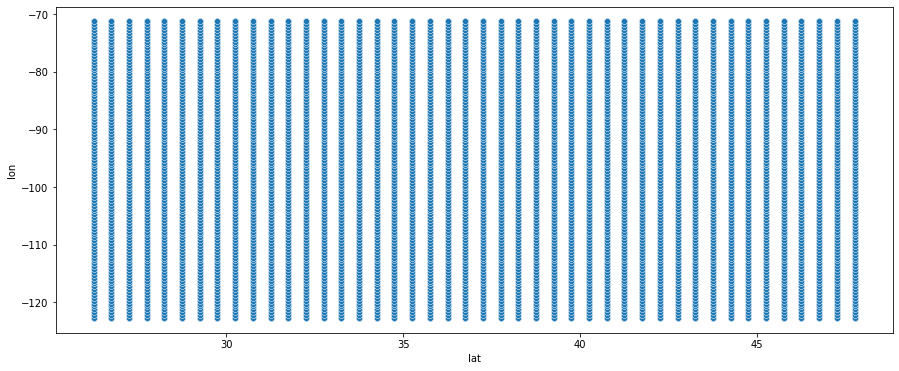

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 6))
sns.scatterplot(data['lat'], data['lon'])
plt.show()

In [101]:
from pykrige.ok import OrdinaryKriging
from pykrige.uk import UniversalKriging

In [72]:
data_krig = data.copy()

In [73]:
time_values = data_krig['time']
latitude_values = data_krig['lat']
longitude_values = data_krig['lon']
temp_values = data_krig['timeseries-tas-monthly-mean']

In [104]:
ordinary_krig = OrdinaryKriging(x=latitude_values, y=longitude_values, z=temp_values, verbose=True, enable_plotting=True)

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...


MemoryError: Unable to allocate 161. TiB for an array with shape (22073703427776,) and data type float64

In [90]:
gridx = np.linspace(time_values.min(), time_values.max(), 1)
gridy = np.linspace(latitude_values.min(), latitude_values.max(), 5)
gridz = np.linspace(longitude_values.min(), longitude_values.max(), 10)

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U10'), dtype('float64')) -> None

In [108]:
data

,time,lat,lon,timeseries-tas-monthly-mean,year,month,dayofyear,quarter
0,1901-01-16,26.25,-122.75,16.322001,1901,1,16,1
1,1901-01-16,26.25,-122.25,16.322001,1901,1,16,1
2,1901-01-16,26.25,-121.75,16.322001,1901,1,16,1
3,1901-01-16,26.25,-121.25,16.322001,1901,1,16,1
4,1901-01-16,26.25,-120.75,16.322001,1901,1,16,1
...,...,...,...,...,...,...,...,...
6644347,2021-12-16,47.75,-73.25,-8.400001,2021,12,350,4
6644348,2021-12-16,47.75,-72.75,-8.500000,2021,12,350,4
6644349,2021-12-16,47.75,-72.25,-9.000000,2021,12,350,4
6644350,2021-12-16,47.75,-71.75,-9.500000,2021,12,350,4


In [ ]:
time_values = data_krig['time']
latitude_values = data_krig['lat']
longitude_values = data_krig['lon']
temp_values = data_krig['timeseries-tas-monthly-mean']

In [115]:
from scipy.interpolate import griddata

points = np.column_stack((data.iloc[:, 0], data.iloc[:, 1], data.iloc[:, 2]))

# Define the temperature values
values = data.iloc[:, 3]

monthly_sequence = np.arange(1, 13)

# Define the latitude and longitude ranges
lat_range = (26.250, 47.750)
lon_range = (-122.750, -71.250)

# Define the new grid
new_time, new_lat, new_lon = np.mgrid[monthly_sequence,
                                      np.linspace(lat_range[0], lat_range[1], num=50),
                                      np.linspace(lon_range[0], lon_range[1], num=60)]

# Interpolate the temperature data to the new grid
X,Y,Z = np.meshgrid(new_time, new_lat, new_lon, indexing='ij')
temp_interp = griddata((time,lat,lon), data[:, 3], (X,Y,Z), method='linear')

AttributeError: 'numpy.ndarray' object has no attribute 'step'

In [19]:
data_copy = data.iloc[:, [0, 1, 2, 3]]

In [20]:
data.shape

(6644352, 8)

In [21]:
data_copy.head(1)

,time,lat,lon,timeseries-tas-monthly-mean
0,1901-01-16,26.25,-122.75,16.322001


In [22]:
data_copy['time'] = pd.to_datetime(data_copy['time'])
data_copy.set_index('time', inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16456\21060341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_copy['time'] = pd.to_datetime(data_copy['time'])


In [23]:
data_copy.groupby(['lat','lon']).resample('M').mean()

lat     lon  timeseries-tas-monthly-mean
lat   lon     time                                                  
26.25 -122.75 1901-01-31  26.25 -122.75                    16.322001
              1901-02-28  26.25 -122.75                    16.559001
              1901-03-31  26.25 -122.75                    16.634000
              1901-04-30  26.25 -122.75                    13.617001
              1901-05-31  26.25 -122.75                    13.450000
...                         ...     ...                          ...
47.75 -71.25  2021-08-31  47.75  -71.25                    15.300000
              2021-09-30  47.75  -71.25                    10.200000
              2021-10-31  47.75  -71.25                     5.800000
              2021-11-30  47.75  -71.25                    -4.300000
              2021-12-31  47.75  -71.25                    -9.900001

[6644352 rows x 3 columns]

In [126]:
monthly_mean = data_copy.resample('M').mean()

In [127]:
monthly_mean.head()

,lat,lon,timeseries-tas-monthly-mean
time,,,
1901-01-31,37.0,-97.0,2.729315
1901-02-28,37.0,-97.0,1.498751
1901-03-31,37.0,-97.0,6.857611
1901-04-30,37.0,-97.0,11.149125
1901-05-31,37.0,-97.0,16.921551


In [128]:
monthly_mean.shape

(1452, 3)

In [138]:
new_frame = data_copy[['lat', 'lon', 'timeseries-tas-monthly-mean']].resample('M').mean()

In [139]:
new_frame.describe()

,lat,lon,timeseries-tas-monthly-mean
count,1452.0,1452.0,1452.000000
mean,37.0,-97.0,13.019086
std,0.0,0.0,7.637712
min,37.0,-97.0,-1.815555
25%,37.0,-97.0,5.924297
50%,37.0,-97.0,13.383603
75%,37.0,-97.0,20.371798
max,37.0,-97.0,25.093822


In [61]:
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split

num_features = 4  # Number of features (time, latitude, longitude)
hidden_units = 32  # Number of hidden units in the LSTM
timesteps = 12  # Number of timesteps in the LSTM
lstm_layers = 1  # Number of LSTM layers
batch_size = 32  # Number of samples in each batch
num_epochs = 100  # Number of training epochs

# Split the data into train and test sets
train_data, test_data = train_test_split(df_copy, test_size=0.2)

# Extract the temperature, time, latitude, and longitude values from the data
X_train = train_data[['year', 'month', 'quarter', 'season']]
y_train = train_data['timeseries-tas-monthly-mean']
X_test = test_data[['year', 'month', 'quarter', 'season']]
y_test = test_data['timeseries-tas-monthly-mean']

print(f"X Train Shape: {X_train.shape}, y Train Shape: {y_train.shape}, X Test Shape: {X_test.shape}, y Test Shape:: {y_test.shape}")

class LSTMModel(nn.Module):
    def __init__(self, num_features, hidden_units, timesteps, lstm_layers):
        super().__init__()
        self.num_features = num_features
        self.hidden_units = hidden_units
        self.num_layers = lstm_layers
        self.seq_len = timesteps
        self.lstm = nn.LSTM(
            input_size=num_features,
            hidden_size=hidden_units,
            batch_first=True,
            num_layers=self.num_layers,
            dropout = 0.2,
        )
        self.dropout = nn.Dropout(0.3)
        self.linear = nn.Linear(hidden_units, 1)

    def forward(self, x):
        print(f"X Shape: {x.shape}")
        lstm_out, (hn, _) = self.lstm(x)
        print(f"LSTM OUTPUT SHAPE: {lstm_out.shape}, hn shape: {hn.shape}, _ shape; {_.shape}")
        lstm_out = lstm_out.reshape(lstm_out.shape[0], -1)
        print(f"lstm_out Shape: {lstm_out.shape}")
        out = self.dropout(lstm_out)
        out = self.linear(out)
        return out

# Initialize the model
model = LSTMModel(num_features, hidden_units, timesteps, lstm_layers)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

# Train the model
for epoch in range(num_epochs):
    for i in range(0, len(X_train), batch_size):
        # Get the current batch of data
        X_batch = X_train.iloc[i:i+batch_size].values
        print(f"X batch shape :{X_batch.shape}")
        y_batch = y_train.iloc[i:i+batch_size].values
        print(f"y batch shape: {y_batch.shape}")
        
        # Convert the data to tensors
        X_batch = torch.FloatTensor(X_batch)
        print(f"X batch shape: {X_batch.shape}")
        y_batch = torch.FloatTensor(y_batch)
        print(f"y batch shape: {y_batch.shape}")
        #X_batch = X_batch.view(-1, num_features)  
        #print(f"X batch shape: {X_batch.shape}")
        output = model(X_batch)
        print(f"output shape: {output.shape}")
        loss = criterion(output, y_batch)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Print the loss for each epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    
with torch.no_grad():
    X_test = torch.FloatTensor(X_test.values)
    X_test = X_test.view(-1, num_features)
    y_test = torch.FloatTensor(y_test.values)
    y_pred = model(X_test)
    test_loss = criterion(y_pred, y_test)
    print(f'Test Loss: {test_loss.item():.4f}')

X Train Shape: (1161, 4), y Train Shape: (1161,), X Test Shape: (291, 4), y Test Shape:: (291,)
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
ou

C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([9])) that is different to the input size (torch.Size([9, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(9, 4)
y batch shape: (9,)
X batch shape: torch.Size([9, 4])
y batch shape: torch.Size([9])
X Shape: torch.Size([9, 4])
LSTM OUTPUT SHAPE: torch.Size([9, 32]), hn shape: torch.Size([1, 32])

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1

LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1

LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

LSTM OUTPUT SHAPE: torch.Size([9, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([9, 32])
output shape: torch.Size([9, 1])
Epoch [17/100], Loss: 173.2673
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 3

LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(9, 4)
y batch shape: (9,)
X batch shape: torch.S

LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(9, 4)
y batch shape: (9,)
X batch shape: torch.Size([9, 4])
y batch shape: torch.Size([9])
X Shape: torch.Size([9, 4])
LSTM OUTPUT SHAPE: torch.Size([9, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([9, 32])
output shape: torch.Size([9, 1])
Epoch [30/100], Loss: 117.8785
X batch shape :(32, 4)
y batch shape: (32

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1

LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1

X batch shape :(9, 4)
y batch shape: (9,)
X batch shape: torch.Size([9, 4])
y batch shape: torch.Size([9])
X Shape: torch.Size([9, 4])
LSTM OUTPUT SHAPE: torch.Size([9, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([9, 32])
output shape: torch.Size([9, 1])
Epoch [35/100], Loss: 89.1156
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,

LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1

LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(9, 4)
y batch shape: (9,)
X batch shape: torch.Size([9, 4])
y batch shape: torch.Size([9])
X Shape: torch.Size([9, 4])
LSTM OUTPUT SHAPE: torch.Size([9, 32]), hn shape: torch.Size([1, 32])

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1

LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1

LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1

output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([3

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

X batch shape :(9, 4)
y batch shape: (9,)
X batch shape: torch.Size([9, 4])
y batch shape: torch.Size([9])
X Shape: torch.Size([9, 4])
LSTM OUTPUT SHAPE: torch.Size([9, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([9, 32])
output shape: torch.Size([9, 1])
Epoch [54/100], Loss: 78.3178
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,

LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(9, 4)
y batch shape: (9,)
X batch shape: torch.Size([9, 4])
y batch shape: torch.Size([9])
X Shape: torch.Size([9, 4])
LSTM OUTPUT SHAPE: torch.Size([9, 32]), hn shape: torch.Size([1, 32])

output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

X batch shape :(9, 4)
y batch shape: (9,)
X batch shape: torch.Size([9, 4])
y batch shape: torch.Size([9])
X Shape: torch.Size([9, 4])
LSTM OUTPUT SHAPE: torch.Size([9, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([9, 32])
output shape: torch.Size([9, 1])
Epoch [60/100], Loss: 57.2024
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,

LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(9, 4)
y batch shape: (9,)
X batch shape: torch.Size([9, 4])
y batch shape: torch.Size([9])
X Shape: torch.Size([9, 4])
LSTM OUTPUT SHAPE: torch.Size([9, 32]), hn shape: torch.Size([1, 32])

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(9, 4)
y batch shape: (9,)
X batch shape: torch.Size([9, 4])
y batch shape: torch.Size([9])
X Shape: torch.Size([9, 4])
LSTM OUTPUT SHAPE: torch.Size([9, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([9, 32])
output shape: torch.Size([9, 1])
Epoch [66/100], Loss: 75.2513
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), h

LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1

LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1

LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1

LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1

X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32

LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(9, 4)
y batch shape: (9,)
X batch shape: torch.Size([9, 4])
y batch shape: torch.Size([9])
X Shape: torch.Size([9, 4])
LSTM OUTPUT SHAPE: torch.Size([9, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([9, 32])
output shape: torch.Size([9, 1])
Epoch [85/100], Loss: 64.8693
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), h

LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1

output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(9, 4)
y batch shape: (9,)
X batch shape: torch.Size([9, 4])
y batch shape: torch.Size([9])
X Shape: torch.Size([9, 4])
LSTM OUTPUT SHAPE: torch.Size([9, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([9, 32])
output shape: torch.Size([9, 1])
Epoch [96/100], Loss: 66.1285
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1

X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch

LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1, 32]), _ shape; torch.Size([1, 32])
lstm_out Shape: torch.Size([32, 32])
output shape: torch.Size([32, 1])
X batch shape :(32, 4)
y batch shape: (32,)
X batch shape: torch.Size([32, 4])
y batch shape: torch.Size([32])
X Shape: torch.Size([32, 4])
LSTM OUTPUT SHAPE: torch.Size([32, 32]), hn shape: torch.Size([1

Test Loss: 64.4686


C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([291])) that is different to the input size (torch.Size([291, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [285]:
X_batch = X_batch.view(-1, timesteps, num_features)

# Train the model
for epoch in range(num_epochs):
    for i in range(0, len(X_train), batch_size):
        # Get the current batch of data
        X_batch = X_train.iloc[i:i+batch_size].values
        y_batch = y_train.iloc[i:i+batch_size].values
        
        # Convert the data to tensors
        X_batch = torch.FloatTensor(X_batch)
        y_batch = torch.FloatTensor(y_batch)
        X_batch = X_batch.view(-1, timesteps, num_features)    
        output = model(X_batch)
        loss = criterion(output, y_batch)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Print the loss for each epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

RuntimeError: shape '[-1, 12, 4]' is invalid for input of size 36

In [136]:
data.set_index().resample('M', on='time')['lat', 'lon', 'timeseries-tas-monthly-mean'].mean()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'